In [34]:
using LinearAlgebra, Distributions

In [35]:
using Plots

In [2]:
#remark endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


In [68]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [32]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 1.85381  2.15657    ⋅         ⋅       …   ⋅          ⋅          ⋅ 
 2.15657  0.521804  2.89165    ⋅           ⋅          ⋅          ⋅ 
  ⋅       2.89165   0.347749  2.97803      ⋅          ⋅          ⋅ 
  ⋅        ⋅        2.97803   2.16042      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅        2.40936      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅       …   ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          3.42761     ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          0.717899   1.27058     ⋅ 
  ⋅        ⋅         ⋅         ⋅          1.27058   -0.25619    0.429052
  ⋅        ⋅         ⋅         ⋅           ⋅         0.429052  -0.262212

In [7]:
n=10000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

 24.125042 seconds (1.24 M allocations: 829.583 MiB, 0.77% gc time)


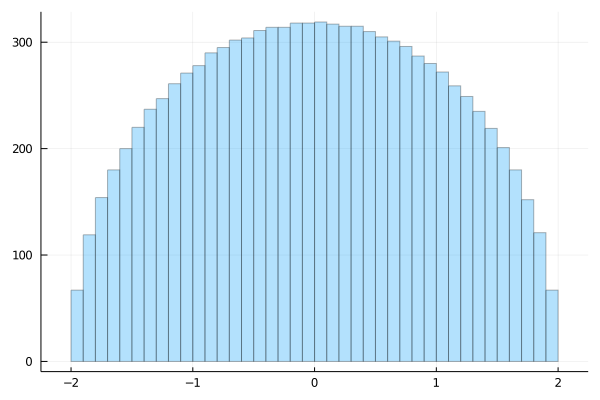

In [10]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

In [39]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [57]:
# n*m 
n=1000
m=300
#example 5*4
X=B(n,m,1);
X=Array(X)

300×300 Array{Float64,2}:
 31.4122   0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
 17.8422  31.1334   0.0      0.0      0.0         0.0       0.0        0.0
  0.0     18.2339  32.8501   0.0      0.0         0.0       0.0        0.0
  0.0      0.0     18.7135  30.3871   0.0         0.0       0.0        0.0
  0.0      0.0      0.0     18.0412  30.2466      0.0       0.0        0.0
  0.0      0.0      0.0      0.0     17.0073  …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0

In [58]:
W=Transpose(X)*X
@time list1=eigen(W).values

  0.034592 seconds (15 allocations: 2.169 MiB)


300-element Array{Float64,1}:
  208.68744908007662
  216.78409494430224
  226.38501276275377
  230.31296170824336
  235.66600955328366
  245.01979982504963
  247.25475326801282
  252.05869519776607
  258.03106430608943
  264.72374787849697
  266.3666387723476
  271.0168584657783
  277.28411169465664
    ⋮
 2098.5980978428843
 2103.196767032694
 2119.726786744986
 2131.838448155109
 2166.6503157747925
 2187.5779812064548
 2203.678309019772
 2226.4914088720147
 2241.2674591649156
 2301.7030511343987
 2309.5505855004913
 2388.4688266365147

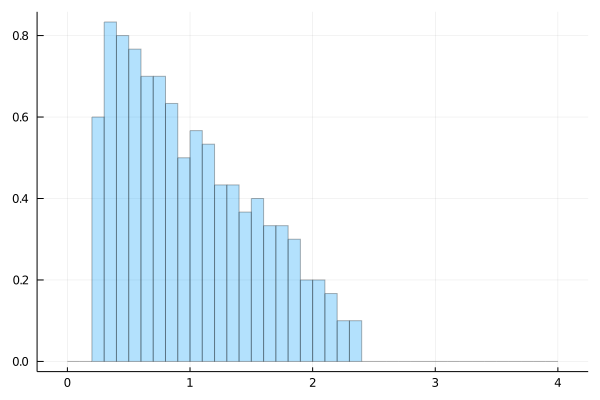

In [66]:
histogram(list1/n,legend=false,norm=true,alpha=0.3,bin=0:0.1:4)

## 課題1

In [116]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.564603 seconds (9.00 M allocations: 2.631 GiB, 7.43% gc time)


0.015079153419959565